In [1]:
# Dependencies 
import pandas as pd
import matplotlib as plt
from pathlib import Path
import numpy as np
# plt.style.use("bmh")
import matplotlib.pyplot as plt


In [2]:
# File to Load
file = Path("Resources/U.S._Chronic_Disease_Indicators.csv")


In [3]:
# Read U.S chronic desease data File and store into Pandas DataFrame
chronic_df = pd.read_csv(file, low_memory=True)

# Data Frame chronic disease, 5 first rows 
chronic_df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


#Cleaning data

In [4]:
# Exploring to see all our columns 
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [5]:
# Exploring the whole data 
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

In [6]:
# Create a boolean series indicating columns with zero non-null values
empty_column_filter_series = chronic_df.count() == 0 
# Display the boolean series
empty_column_filter_series

YearStart                    False
YearEnd                      False
LocationAbbr                 False
LocationDesc                 False
DataSource                   False
Topic                        False
Question                     False
Response                      True
DataValueUnit                False
DataValueType                False
DataValue                    False
DataValueAlt                 False
DataValueFootnoteSymbol      False
DataValueFootnote            False
LowConfidenceLimit           False
HighConfidenceLimit          False
StratificationCategory1      False
Stratification1              False
StratificationCategory2       True
Stratification2               True
StratificationCategory3       True
Stratification3               True
Geolocation                  False
LocationID                   False
TopicID                      False
QuestionID                   False
ResponseID                    True
DataValueTypeID              False
StratificationCatego

In [7]:
# Selects the count of non-null values for columns identified as empty by empty_column_filter_series
chronic_df.count()[empty_column_filter_series]

Response                     0
StratificationCategory2      0
Stratification2              0
StratificationCategory3      0
Stratification3              0
ResponseID                   0
StratificationCategoryID2    0
StratificationID2            0
StratificationCategoryID3    0
StratificationID3            0
dtype: int64

In [8]:
# Get the names of columns with no data (identified by empty_column_filter_series)
empty_columns = chronic_df.count()[empty_column_filter_series].index
# Display empty_columns variable 
empty_columns

Index(['Response', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'ResponseID',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [9]:
# Remove columns with no data (identified by empty_columns) from the DataFrame chronic_df
# inplace=True ensures the changes are made to chronic_df directly
chronic_df.drop(columns=empty_columns, inplace=True)

In [10]:
# Print the shape of the DataFrame chronic_df (number of rows, number of columns)
print(chronic_df.shape)
# Print the column names of the DataFrame chronic_df after dropping non-null columns 
chronic_df.columns

(311745, 24)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

#How has the prevalence of chronic diseases changed from 2015 to 2022, and are there any significant trends or patterns over time?

In [11]:
# Count occurrences of each year in the "YearStart" column
# We want to see this result to understand the distribution of data over the years
chronic_df["YearStart"].value_counts()

YearStart
2019    88823
2021    87600
2020    67999
2022    47125
2016     8760
2015     8760
2018     2678
Name: count, dtype: int64

In [12]:
# Count instances of each location abbreviation in the "LocationAbbr" column
chronic_df["LocationAbbr"].value_counts()

LocationAbbr
US    5809
TN    5796
GA    5794
ND    5794
MA    5794
OR    5794
MI    5794
MO    5794
CO    5794
NY    5794
CT    5794
AR    5794
MS    5794
VA    5794
WI    5794
DE    5794
NE    5794
HI    5794
UT    5794
LA    5794
MN    5794
IL    5794
DC    5794
WA    5794
VT    5794
ME    5794
PA    5794
WY    5794
NJ    5794
KS    5794
AL    5794
MT    5788
SD    5786
NM    5786
NH    5745
MD    5745
FL    5745
IA    5745
KY    5745
WV    5745
AK    5737
NC    5696
RI    5696
OK    5696
AZ    5688
CA    5647
OH    5647
IN    5647
TX    5647
ID    5647
NV    5647
SC    5647
PR    4212
VI    4015
GU    4015
Name: count, dtype: int64

In [13]:
# Count instances of each location description grouped by location abbreviation
location_counts = chronic_df.groupby("LocationAbbr")["LocationDesc"].value_counts()
location_counts


LocationAbbr  LocationDesc        
AK            Alaska                  5737
AL            Alabama                 5794
AR            Arkansas                5794
AZ            Arizona                 5688
CA            California              5647
CO            Colorado                5794
CT            Connecticut             5794
DC            District of Columbia    5794
DE            Delaware                5794
FL            Florida                 5745
GA            Georgia                 5794
GU            Guam                    4015
HI            Hawaii                  5794
IA            Iowa                    5745
ID            Idaho                   5647
IL            Illinois                5794
IN            Indiana                 5647
KS            Kansas                  5794
KY            Kentucky                5745
LA            Louisiana               5794
MA            Massachusetts           5794
MD            Maryland                5745
ME            Maine

In [14]:
# Count the number of unique values in each column of chronic_df
chronic_df.nunique()

YearStart                        7
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
DataSource                      14
Topic                           19
Question                       109
DataValueUnit                    8
DataValueType                   12
DataValue                    14852
DataValueAlt                 14852
DataValueFootnoteSymbol          9
DataValueFootnote                9
LowConfidenceLimit            8412
HighConfidenceLimit           8861
StratificationCategory1          5
Stratification1                 26
Geolocation                     54
LocationID                      55
TopicID                         19
QuestionID                     109
DataValueTypeID                 12
StratificationCategoryID1        5
StratificationID1               26
dtype: int64

In [15]:
# Sorting our locationAbbr provide a better view to analyse this column 
sorted(chronic_df["LocationAbbr"].unique())

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [16]:
# creating an array with the states without the territories 
states_array = ['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [17]:
# Filter the DataFrame
us_df = chronic_df[chronic_df["LocationAbbr"].isin(states_array)]
#Displaying dataframe 
us_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
5,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
6,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF


In [18]:
#adding 0 for NaN values in column "DataValue"
us_cleaned_df = us_df.fillna({"DataValue": 0})
us_cleaned_df.head(800)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
5,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
6,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2015,2019,MD,Maryland,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Age-adjusted Rate,21.0,...,21.7,Sex,Female,POINT (-76.60926011099963 39.29058096400047),24,CAN,CAN02,AGEADJRATE,SEX,SEXF
837,2015,2019,KS,Kansas,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,"per 100,000",Crude Rate,201.5,...,204.8,Sex,Male,POINT (-98.20078122699965 38.34774030000045),20,CAN,CAN08,CRDRATE,SEX,SEXM
838,2015,2019,FL,Florida,US Cancer DVT,Cancer,Colon and rectum (colorectal) cancer mortality...,"per 100,000",Age-adjusted Rate,15.1,...,15.4,Sex,Male,POINT (-81.92896053899966 28.932040377000476),12,CAN,CAN01,AGEADJRATE,SEX,SEXM
839,2015,2019,NM,New Mexico,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",Number,Number,12.0,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-106.24058098499967 34.52088095200048),35,CAN,CAN02,NMBR,RACE,AIAN


In [19]:
# Reseting the index for a more aestethic view
us_chronic_df = us_cleaned_df.reset_index(drop=True)
us_chronic_df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
1,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
2,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
3,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,...,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,ART,ART01,CRDPREV,AGE,AGE65P
4,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,...,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046),40,ART,ART01,CRDPREV,SEX,SEXF
5,2019,2019,WV,West Virginia,NVSS,Health Status,Life expectancy at birth,Years,Number,71.9,...,72.2,Sex,Male,POINT (-80.71264013499967 38.66551020200046),54,HEA,HEA06,NMBR,SEX,SEXM
6,2020,2020,AL,Alabama,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,5.0,...,6.8,Age,Age 18-44,POINT (-86.63186076199969 32.84057112200048),1,DIA,DIA01,CRDPREV,AGE,AGE1844
7,2020,2020,AK,Alaska,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,20.8,...,23.8,Sex,Male,POINT (-147.72205903599973 64.84507995700051),2,DIS,DIS01,CRDPREV,SEX,SEXM
8,2020,2020,IL,Illinois,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,88.0,...,NaN,Sex,Female,POINT (-88.99771017799969 40.48501028300046),17,AST,AST01,NMBR,SEX,SEXF
9,2020,2020,KS,Kansas,BRFSS,Sleep,Short sleep duration among adults,%,Crude Prevalence,32.7,...,34.5,Sex,Male,POINT (-98.20078122699965 38.34774030000045),20,SLEP,SLP03,CRDPREV,SEX,SEXM


In [20]:
# Displaying name of columns 
us_chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [21]:
# Dropping empty columns 
us_chronic_df = us_chronic_df.drop(columns=['LocationID','TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'], axis=1)
us_chronic_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
1,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
2,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
3,2019,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,51.8,NaN,NaN,49.8,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048)
4,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,30.5,NaN,NaN,28.7,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046)


In [22]:
# How has the prevalence of chronic diseases changed from 2015 to 2022,
# and are there any significant trends or patterns over time?

# list all chronic diseases grouped and count them by year.
# example:
# cancer 2018-2018 30
# diabiits 2018 10
# ...
# -----  second version
# diabitis,          2015 , 2016, 2017
# Crude Prevalence   23      12    10
# Crude Rate         10%     15%   10%
#   asma          


    

In [23]:
#selecting the columns we want to work with 
chronic_per_year =us_chronic_df[["YearStart","LocationDesc","Topic","DataValueType","DataValue"]]
chronic_per_year

,YearStart,LocationDesc,Topic,DataValueType,DataValue
0,2019,Georgia,Disability,Crude Prevalence,44.0
1,2019,Maine,Diabetes,Crude Prevalence,11.4
2,2019,Nevada,Health Status,Number,78.0
3,2019,Ohio,Arthritis,Crude Prevalence,51.8
4,2019,Oklahoma,Arthritis,Crude Prevalence,30.5
...,...,...,...,...,...
287895,2022,Vermont,Mental Health,Crude Mean,7.2
287896,2022,Virginia,"Nutrition, Physical Activity, and Weight Status",Age-adjusted Prevalence,31.6
287897,2022,Washington,Sleep,Crude Prevalence,25.3
287898,2022,Utah,Immunization,Crude Prevalence,0.0


In [24]:
#transforming our dataframe with Topic and DataValueType as index and transposing the years into columns 
chronic_pivot_df = chronic_per_year.pivot_table(index=['Topic', 'DataValueType'], columns='YearStart', values='DataValue')
chronic_pivot_df.head(20)

YearStart                                                2015         2016  \
Topic     DataValueType                                                      
Alcohol   Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude 75th percentile                           NaN          NaN   
          Crude Median                                    NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
          Per capita alcohol consumption gallons          NaN          NaN   
Arthritis Age-adjusted Prevalence                         NaN          NaN   
          Crude Prevalence                                NaN          NaN   
Asthma    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
Cancer    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                         85.877000    81.541464   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                91.371429    88.418643   
          Number                                  2788.878571  2721.044286   

YearStart                                         2018        2019  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  NaN   12.125800   
          Age-adjusted Rate                        NaN    8.062000   
          Crude 75th percentile                    NaN    3.537752   
          Crude Median                             NaN    2.107923   
          Crude Prevalence                         NaN   13.230683   
          Crude Rate                               NaN   11.533692   
          Number                                   NaN  271.016923   
          Per capita alcohol consumption gallons   NaN    2.468000   
Arthritis Age-adjusted Prevalence                  NaN   19.563486   
          Crude Prevalence                         NaN   22.525614   
Asthma    Age-adjusted Prevalence                  NaN    7.367800   
          Age-adjusted Rate                        NaN    0.362600   
          Crude Prevalence                         NaN    7.662500   
          Crude Rate                               NaN    0.511077   
          Number                                   NaN   18.849231   
Cancer    Age-adjusted Prevalence                  NaN         NaN   
          Age-adjusted Rate                        NaN         NaN   
          Crude Prevalence                         NaN         NaN   
          Crude Rate                               NaN         NaN   
          Number                                   NaN         NaN   

YearStart                                               2020        2021  \
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                  11.746600   11.650000   
          Age-adjusted Rate                        10.815400   12.772000   
          Crude 75th percentile                     3.568450    3.493876   
          Crude Median                              2.137692    2.119077   
          Crude Prevalence                         11.639846   11.149756   
          Crude Rate                               14.414769   16.569385   
          Number                                  315.876923  346.243077   
          Per capita alcohol consumption gallons    2.5454

In [25]:
# Adding 0 to the Nan Values in the years columns 
chronic_pivot_df.fillna(0, inplace=True)
chronic_pivot_df.head(50)

YearStart                                                                                   2015  \
Topic                                 DataValueType                                                
Alcohol                               Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                 0.000000   
                                      Crude 75th percentile                             0.000000   
                                      Crude Median                                      0.000000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                        0.000000   
                                      Number                                            0.000000   
                                      Per capita alcohol consumption gallons            0.000000   
Arthritis                             Age-adjusted Prevalence                           0.000000   
                                      Crude Prevalence                                  0.000000   
Asthma                                Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                 0.000000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                        0.000000   
                                      Number                                            0.000000   
Cancer                                Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                85.877000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                       91.371429   
                                      Number                                         2788.878571   
Cardiovascular Disease                Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                 0.000000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                        0.000000   
                                      Number                                            0.000000   
Chronic Kidney Disease                Adjusted rate by age, sex, race and ethnicity     0.000000   
                                      Number                                            0.000000   
Chronic Obstructive Pulmonary Disease Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                 0.000000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                        0.000000   
                                      Number                                            0.000000   
Cognitive Health and Caregiving       Age-adjusted Prevalence                           0.000000   
                                      Crude Prevalence                                  0.000000   
Diabetes                              Age-adjusted Prevalence                           0.000000   
                                      Age-adjusted Rate                                 0.000000   
                                      Crude Prevalence                                  0.000000   
                                      Crude Rate                                        0.000000   


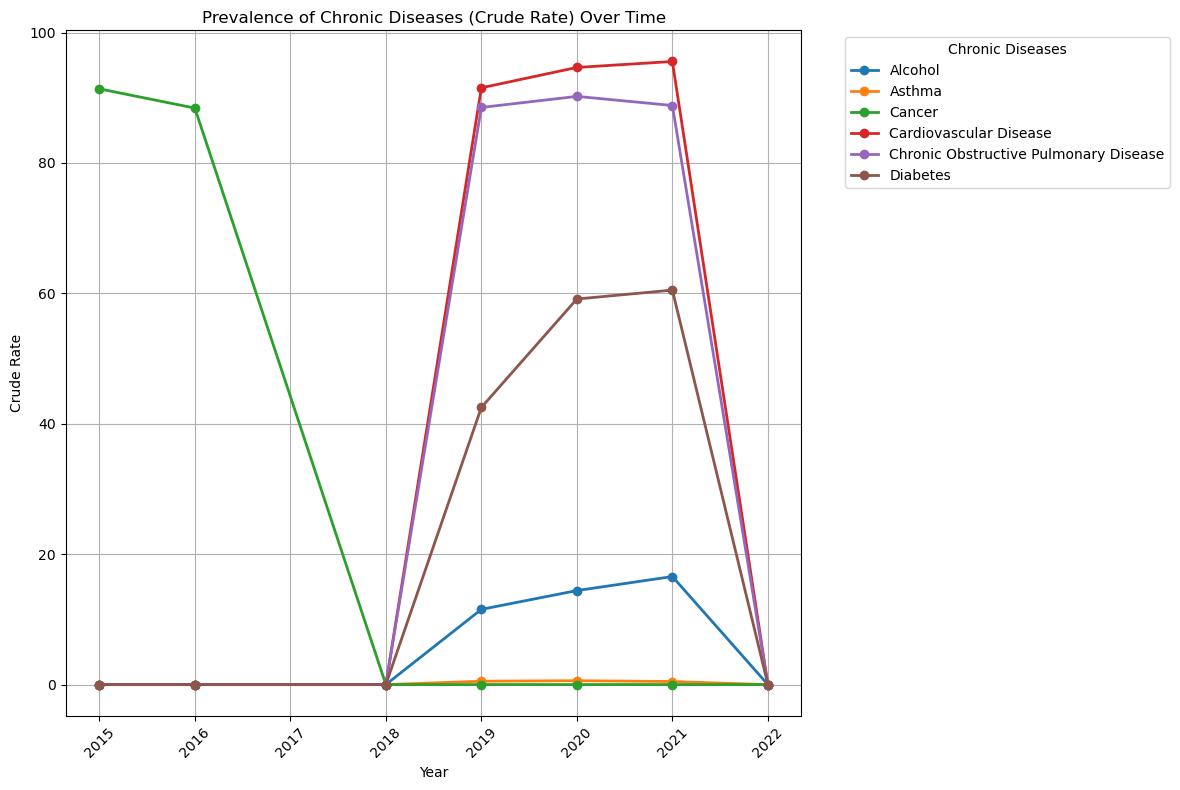

In [26]:

# Filter the DataFrame for 'Crude Rate' data value type
crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

# Plotting
# Plotting
crude_rate_df.T.plot(figsize=(12, 8), marker='o', linewidth=2)  # Plotting transposed DataFrame with marker style 'o' and linewidth 2

plt.title('Prevalence of Chronic Diseases (Crude Rate) Over Time')  # Setting title of the plot
plt.xlabel('Year')  # Setting label for x-axis
plt.ylabel('Crude Rate')  # Setting label for y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.legend(title='Chronic Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adding legend with title and adjusting position
plt.grid(True)  # Adding gridlines to the plot
plt.tight_layout()  # Adjusting layout to prevent overlapping elements
plt.show()  # Displaying the plot

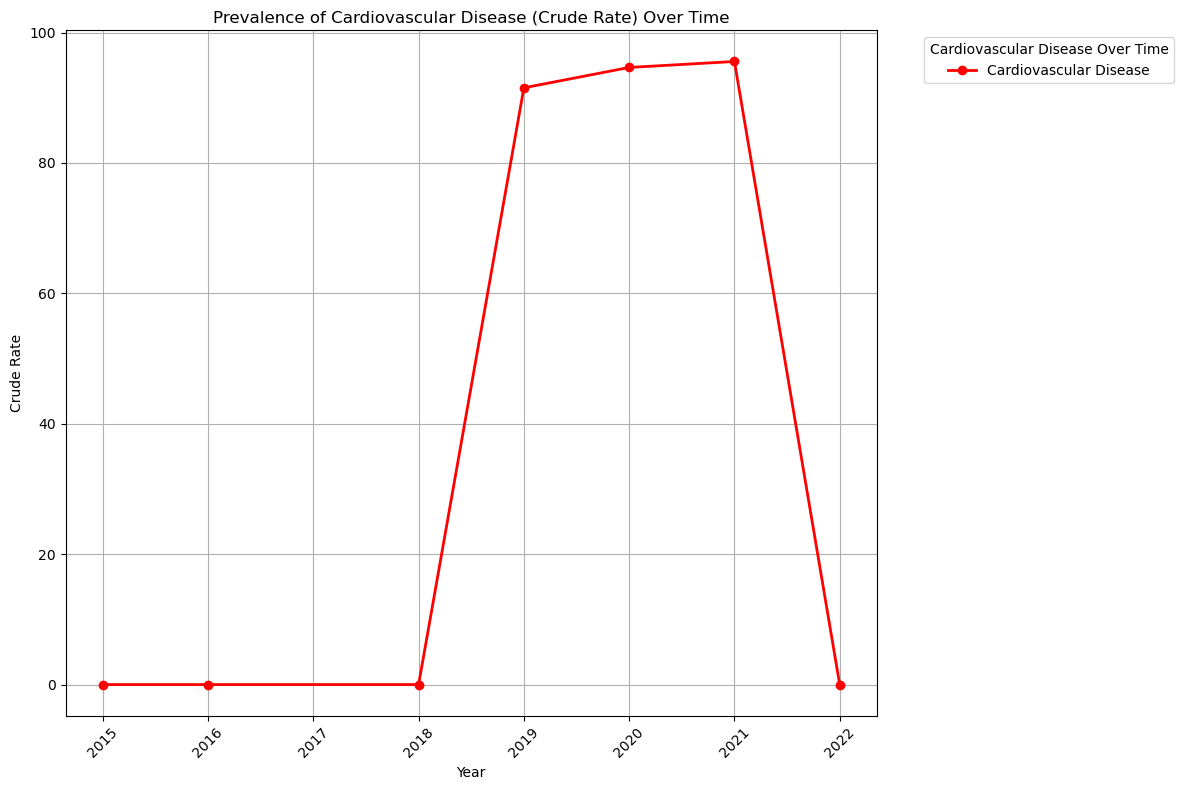

In [27]:
#QUESTION Number 2
#Among chronic diseases, which specific type is the most prevalent in the population, and has its prevalence changed over time?


#Most Prevalent Chronic Disease is Cardiovascular Disease, and how it changed over time
cardiovascular_disease_df = crude_rate_df.loc['Cardiovascular Disease']
cardiovascular_disease_df.plot.line(figsize=(12,8), marker='o', color= 'red', linewidth=2)


plt.title('Prevalence of Cardiovascular Disease (Crude Rate) Over Time')  
plt.xlabel('Year')  
plt.ylabel('Crude Rate')  
plt.xticks(rotation=45)  
plt.legend(title='Cardiovascular Disease Over Time', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

In [28]:
#Dataframe with States adding DataValueType -> Crude Rate
us_chronic_cruderate_df = us_chronic_df.loc[(us_chronic_df["DataValueType"] == "Crude Rate"),:]
#Resetting index 
us_chronic_cruderate_index = us_chronic_cruderate_df.reset_index(drop=True)
#Filling NaN with 0
us_chronic_cruderate_index.fillna(0, inplace=True)
#Sorting the dataframe by the most prevalent disease per region
#us_chronic_cruderate_index.sort_values("DataValue",ascending=True)
#Displaying dataframe
us_chronic_cruderate_index.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-106.13361092099967 38.843840757000464)
1,2016,2020,ID,Idaho,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Sex,Male,POINT (-114.3637300419997 43.682630005000476)
2,2015,2019,TX,Texas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,234.0,234.0,0,0,230.5,237.5,Race/Ethnicity,"Asian or Pacific Islander, non-Hispanic",POINT (-99.42677020599967 31.827240407000488)
3,2015,2019,NC,North Carolina,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Sex,Female,POINT (-79.15925046299964 35.466220975000454)
4,2016,2020,LA,Louisiana,US Cancer DVT,Cancer,Lung and bronchial cancer mortality among all ...,"per 100,000",Crude Rate,44.4,44.4,0,0,42.9,45.9,Race/Ethnicity,"Black, non-Hispanic",POINT (-92.44568007099969 31.31266064400046)
5,2016,2020,MS,Mississippi,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,653.0,653.0,0,0,647.6,658.5,Race/Ethnicity,"White, non-Hispanic",POINT (-89.53803082499968 32.745510099000455)
6,2015,2019,VA,Virginia,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,497.3,497.3,0,0,494.2,500.3,Sex,Male,POINT (-78.45789046299967 37.54268067400045)
7,2015,2019,WI,Wisconsin,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,25.2,25.2,0,0,24.3,26.1,Race/Ethnicity,"White, non-Hispanic",POINT (-89.81637074199966 44.39319117400049)
8,2015,2019,NY,New York,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.0,2.0,0,0,1.7,2.3,Race/Ethnicity,Hispanic,POINT (-75.54397042699964 42.82700103200045)
9,2015,2019,NY,New York,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,345.5,345.5,0,0,342.9,348.2,Race/Ethnicity,Hispanic,POINT (-75.54397042699964 42.82700103200045)


In [181]:
#Filtering the data to only show cardiovascular disease as topic
us_chronic_cruderate_df = us_chronic_df.loc[(us_chronic_df["DataValueType"] == "Crude Rate") & (us_chronic_df["Topic"] == "Cardiovascular Disease"), :]
# Resetting index
us_chronic_cruderate_index = us_chronic_cruderate_df.reset_index(drop=True)
# Filling NaN with 0
us_chronic_cruderate_index.fillna(0, inplace=True)
# Sorting the dataframe by the most prevalent disease per region
us_chronic_cruderate_index.sort_values("DataValue", ascending=True, inplace=True)
# Displaying dataframe
us_chronic_cruderate_index

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,2019,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-111.76381127699972 34.865970280000454)
6627,2021,2021,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
1759,2019,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
6628,2021,2021,SC,South Carolina,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
5993,2021,2021,NH,New Hampshire,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-71.50036091999965 43.65595011300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,2020,2020,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1283.3,1283.3,0,0,1251.9,1314.7,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)
5967,2021,2021,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1284.2,1284.2,0,0,1252.6,1315.8,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)
1889,2019,2019,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1329.2,1329.2,0,0,1300.8,1357.5,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)
4030,2020,2020,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1394.5,1394.5,0,0,1365.8,1423.1,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)


In [183]:
#Dataframe filtered by Race/Ethnicity
us_chronic_ethnicity= us_chronic_cruderate_index[us_chronic_cruderate_index['StratificationCategory1']== 'Race/Ethnicity']
us_chronic_ethnicity

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,2019,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-111.76381127699972 34.865970280000454)
6627,2021,2021,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
1759,2019,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
6628,2021,2021,SC,South Carolina,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
5993,2021,2021,NH,New Hampshire,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-71.50036091999965 43.65595011300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,2019,2019,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,350.8,350.8,0,0,343.6,358.1,Race/Ethnicity,"White, non-Hispanic",POINT (-97.52107021399968 35.47203135600046)
3984,2020,2020,NV,Nevada,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,358.7,358.7,0,0,349.0,368.3,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494)
6200,2021,2021,NV,Nevada,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,361.3,361.3,0,0,351.5,371.0,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494)
3842,2020,2020,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,375.1,375.1,0,0,367.6,382.6,Race/Ethnicity,"White, non-Hispanic",POINT (-97.52107021399968 35.47203135600046)


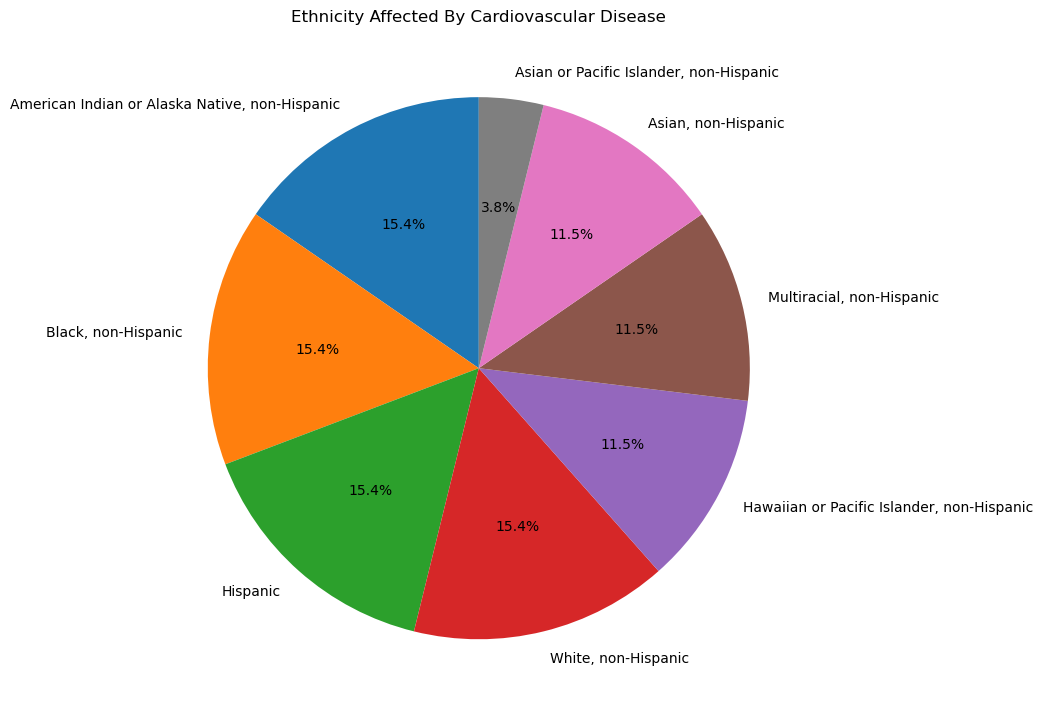

In [255]:
#Pie chart Of ethnicity affected by cardiovascular disease
ethnicity_cardiopie= us_chronic_ethnicity['Stratification1'].value_counts()
plt.figure(figsize=(8.8,8.8))+
ethnicity_cardiopie.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Ethnicity Affected By Cardiovascular Disease')
plt.ylabel('')
plt.show()

In [256]:
# Counting each unique value in the 'Question' column
question_counts = us_chronic_ethnicity['Question'].value_counts()
question_counts

Question
Diseases of the heart mortality among all people, underlying cause                                          1050
Cerebrovascular disease (stroke) mortality among all people, underlying cause                               1050
Coronary heart disease mortality among all people, underlying cause                                         1050
Hospitalization for heart failure as principal diagnosis, Medicare-beneficiaries aged 65 years and older     750
Name: count, dtype: int64

In [257]:
hopitalization_agedover65=us_chronic_ethnicity[us_chronic_ethnicity['Question']=='Hospitalization for heart failure as principal diagnosis, Medicare-beneficiaries aged 65 years and older']
hopitalization_agedover65

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
1759,2019,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.00,0.00,~,Data suppressed; too few respondents or cases,0.00,0.00,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
1751,2019,2019,SD,South Dakota,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.00,0.00,~,Data suppressed; too few respondents or cases,0.00,0.00,Race/Ethnicity,"Black, non-Hispanic",POINT (-100.3735306369997 44.353130053000484)
4367,2020,2020,VT,Vermont,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.00,0.00,~,Data suppressed; too few respondents or cases,0.00,0.00,Race/Ethnicity,Hispanic,POINT (-72.51764079099962 43.62538123900049)
4286,2020,2020,SD,South Dakota,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.00,0.00,~,Data suppressed; too few respondents or cases,0.00,0.00,Race/Ethnicity,Hispanic,POINT (-100.3735306369997 44.353130053000484)
4292,2020,2020,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.00,0.00,~,Data suppressed; too few respondents or cases,0.00,0.00,Race/Ethnicity,Hispanic,POINT (-81.04537120699968 33.998821303000454)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2019,2019,MI,Michigan,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,73.63,73.63,0,0,71.87,75.38,Race/Ethnicity,"Black, non-Hispanic",POINT (-84.71439026999968 44.6613195430005)
2431,2019,2019,WI,Wisconsin,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,75.03,75.03,0,0,70.43,79.62,Race/Ethnicity,"Black, non-Hispanic",POINT (-89.81637074199966 44.39319117400049)
5911,2021,2021,MI,Michigan,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,77.51,77.51,0,0,75.48,79.53,Race/Ethnicity,"Black, non-Hispanic",POINT (-84.71439026999968 44.6613195430005)
5960,2021,2021,MO,Missouri,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,77.51,77.51,0,0,74.60,80.42,Race/Ethnicity,"Black, non-Hispanic",POINT (-92.56630005299968 38.635790776000476)


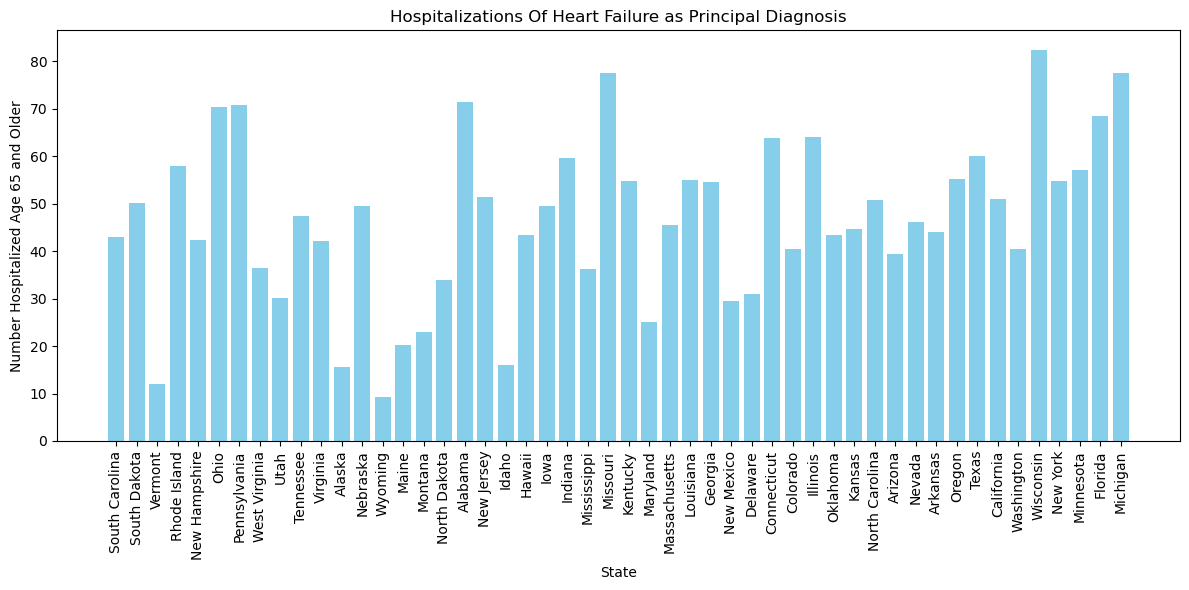

In [264]:
#The hospitalizations for heart failure for 65 and older
locations = hopitalization_agedover65['LocationDesc']
hopitalization_rate = hopitalization_agedover65['DataValue']

plt.figure(figsize=(12, 6))
plt.bar(locations, hopitalization_rate, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number Hospitalized Age 65 and Older')
plt.title('Hospitalizations Of Heart Failure as Principal Diagnosis')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [260]:
stroke_mortality=us_chronic_ethnicity[us_chronic_ethnicity['Question']=='Cerebrovascular disease (stroke) mortality among all people, underlying cause']
stroke_mortality

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
6627,2021,2021,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
4332,2020,2020,TN,Tennessee,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-85.77449091399967 35.68094058000048)
4338,2020,2020,VT,Vermont,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-72.51764079099962 43.62538123900049)
1742,2019,2019,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Black, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
6630,2021,2021,SD,South Dakota,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-100.3735306369997 44.353130053000484)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2020,2020,FL,Florida,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,91.2,91.2,0,0,89.5,93.0,Race/Ethnicity,"White, non-Hispanic",POINT (-81.92896053899966 28.932040377000476)
3044,2020,2020,HI,Hawaii,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,91.5,91.5,0,0,83.1,99.8,Race/Ethnicity,"Asian, non-Hispanic",POINT (-157.85774940299973 21.304850435000446)
5055,2021,2021,FL,Florida,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,92.2,92.2,0,0,90.5,94.0,Race/Ethnicity,"White, non-Hispanic",POINT (-81.92896053899966 28.932040377000476)
4957,2021,2021,DE,Delaware,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,96.4,96.4,0,0,88.6,104.2,Race/Ethnicity,"White, non-Hispanic",POINT (-75.57774116799965 39.008830667000495)


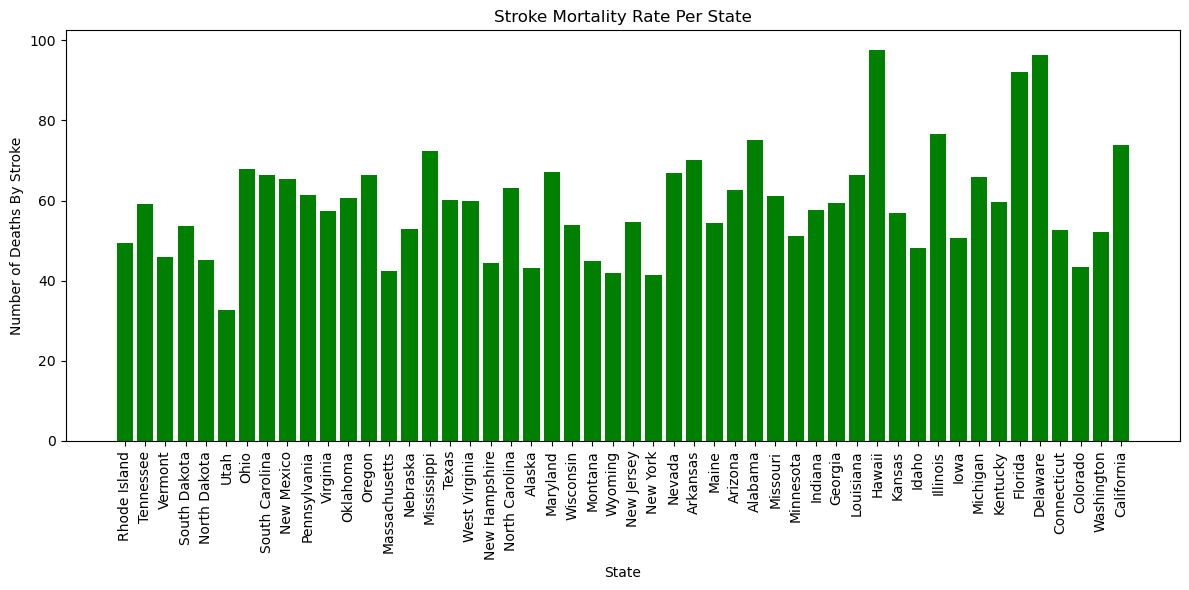

In [272]:
# The stroke mortality rates per state
locations = stroke_mortality['LocationDesc']
stroke_rates = stroke_mortality['DataValue']

plt.figure(figsize=(12, 6))
plt.bar(locations, stroke_rates, color='green')
plt.xlabel('State')
plt.ylabel('Number of Deaths By Stroke')
plt.title('Stroke Mortality Rate Per State')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [32]:
#Filtering by crude rate, data value type
chronic_cleaned = chronic_pivot_df.loc[(slice(None), "Crude Rate"), :]
#Displaying dataframe
chronic_cleaned

,YearStart,2015,2016,2018,2019,2020,2021,2022
Topic,DataValueType,,,,,,,
Alcohol,Crude Rate,0.000000,0.000000,0.0,11.533692,14.414769,16.569385,0.0
Asthma,Crude Rate,0.000000,0.000000,0.0,0.511077,0.593538,0.464462,0.0
Cancer,Crude Rate,91.371429,88.418643,0.0,0.000000,0.000000,0.000000,0.0
Cardiovascular Disease,Crude Rate,0.000000,0.000000,0.0,91.525196,94.651196,95.565370,0.0
Chronic Obstructive Pulmonary Disease,Crude Rate,0.000000,0.000000,0.0,88.514840,90.214545,88.814445,0.0
Diabetes,Crude Rate,0.000000,0.000000,0.0,42.505154,59.136000,60.504000,0.0


In [33]:
cleaned_index = chronic_per_year.loc[(chronic_per_year["DataValueType"] == "Crude Rate"),:]


cleaned_index_df = cleaned_index.reset_index(drop=True)
cleaned_index.head(10)

# Filter data to incidents that caused Property or Contents Loss
# loss_df = fires_cleaned_df.loc[(fires_cleaned_df["Property Loss"] > 0) |
#                                (fires_cleaned_df["Contents Loss"] > 0) , :]
# loss_df.head()

,YearStart,LocationDesc,Topic,DataValueType,DataValue
33,2015,Colorado,Cancer,Crude Rate,0.0
35,2016,Idaho,Cancer,Crude Rate,0.0
38,2015,Texas,Cancer,Crude Rate,234.0
39,2015,North Carolina,Cancer,Crude Rate,0.0
41,2016,Louisiana,Cancer,Crude Rate,44.4
42,2016,Mississippi,Cancer,Crude Rate,653.0
44,2015,Virginia,Cancer,Crude Rate,497.3
46,2015,Wisconsin,Cancer,Crude Rate,25.2
47,2015,New York,Cancer,Crude Rate,2.0
50,2015,New York,Cancer,Crude Rate,345.5


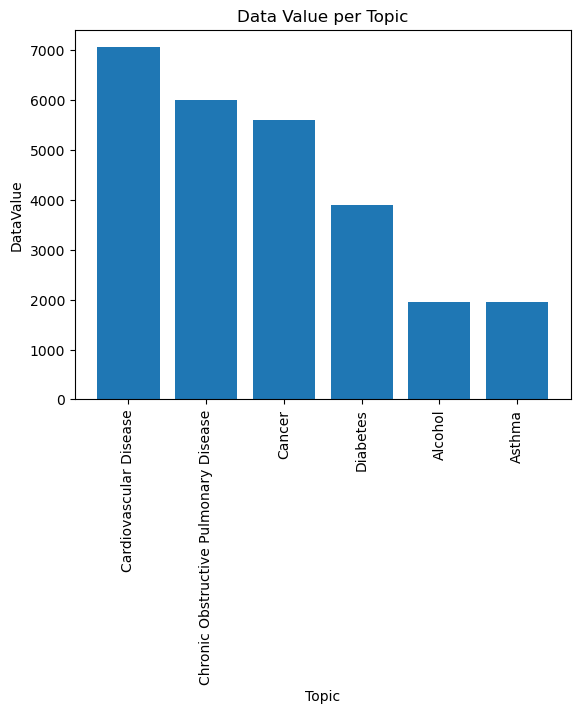

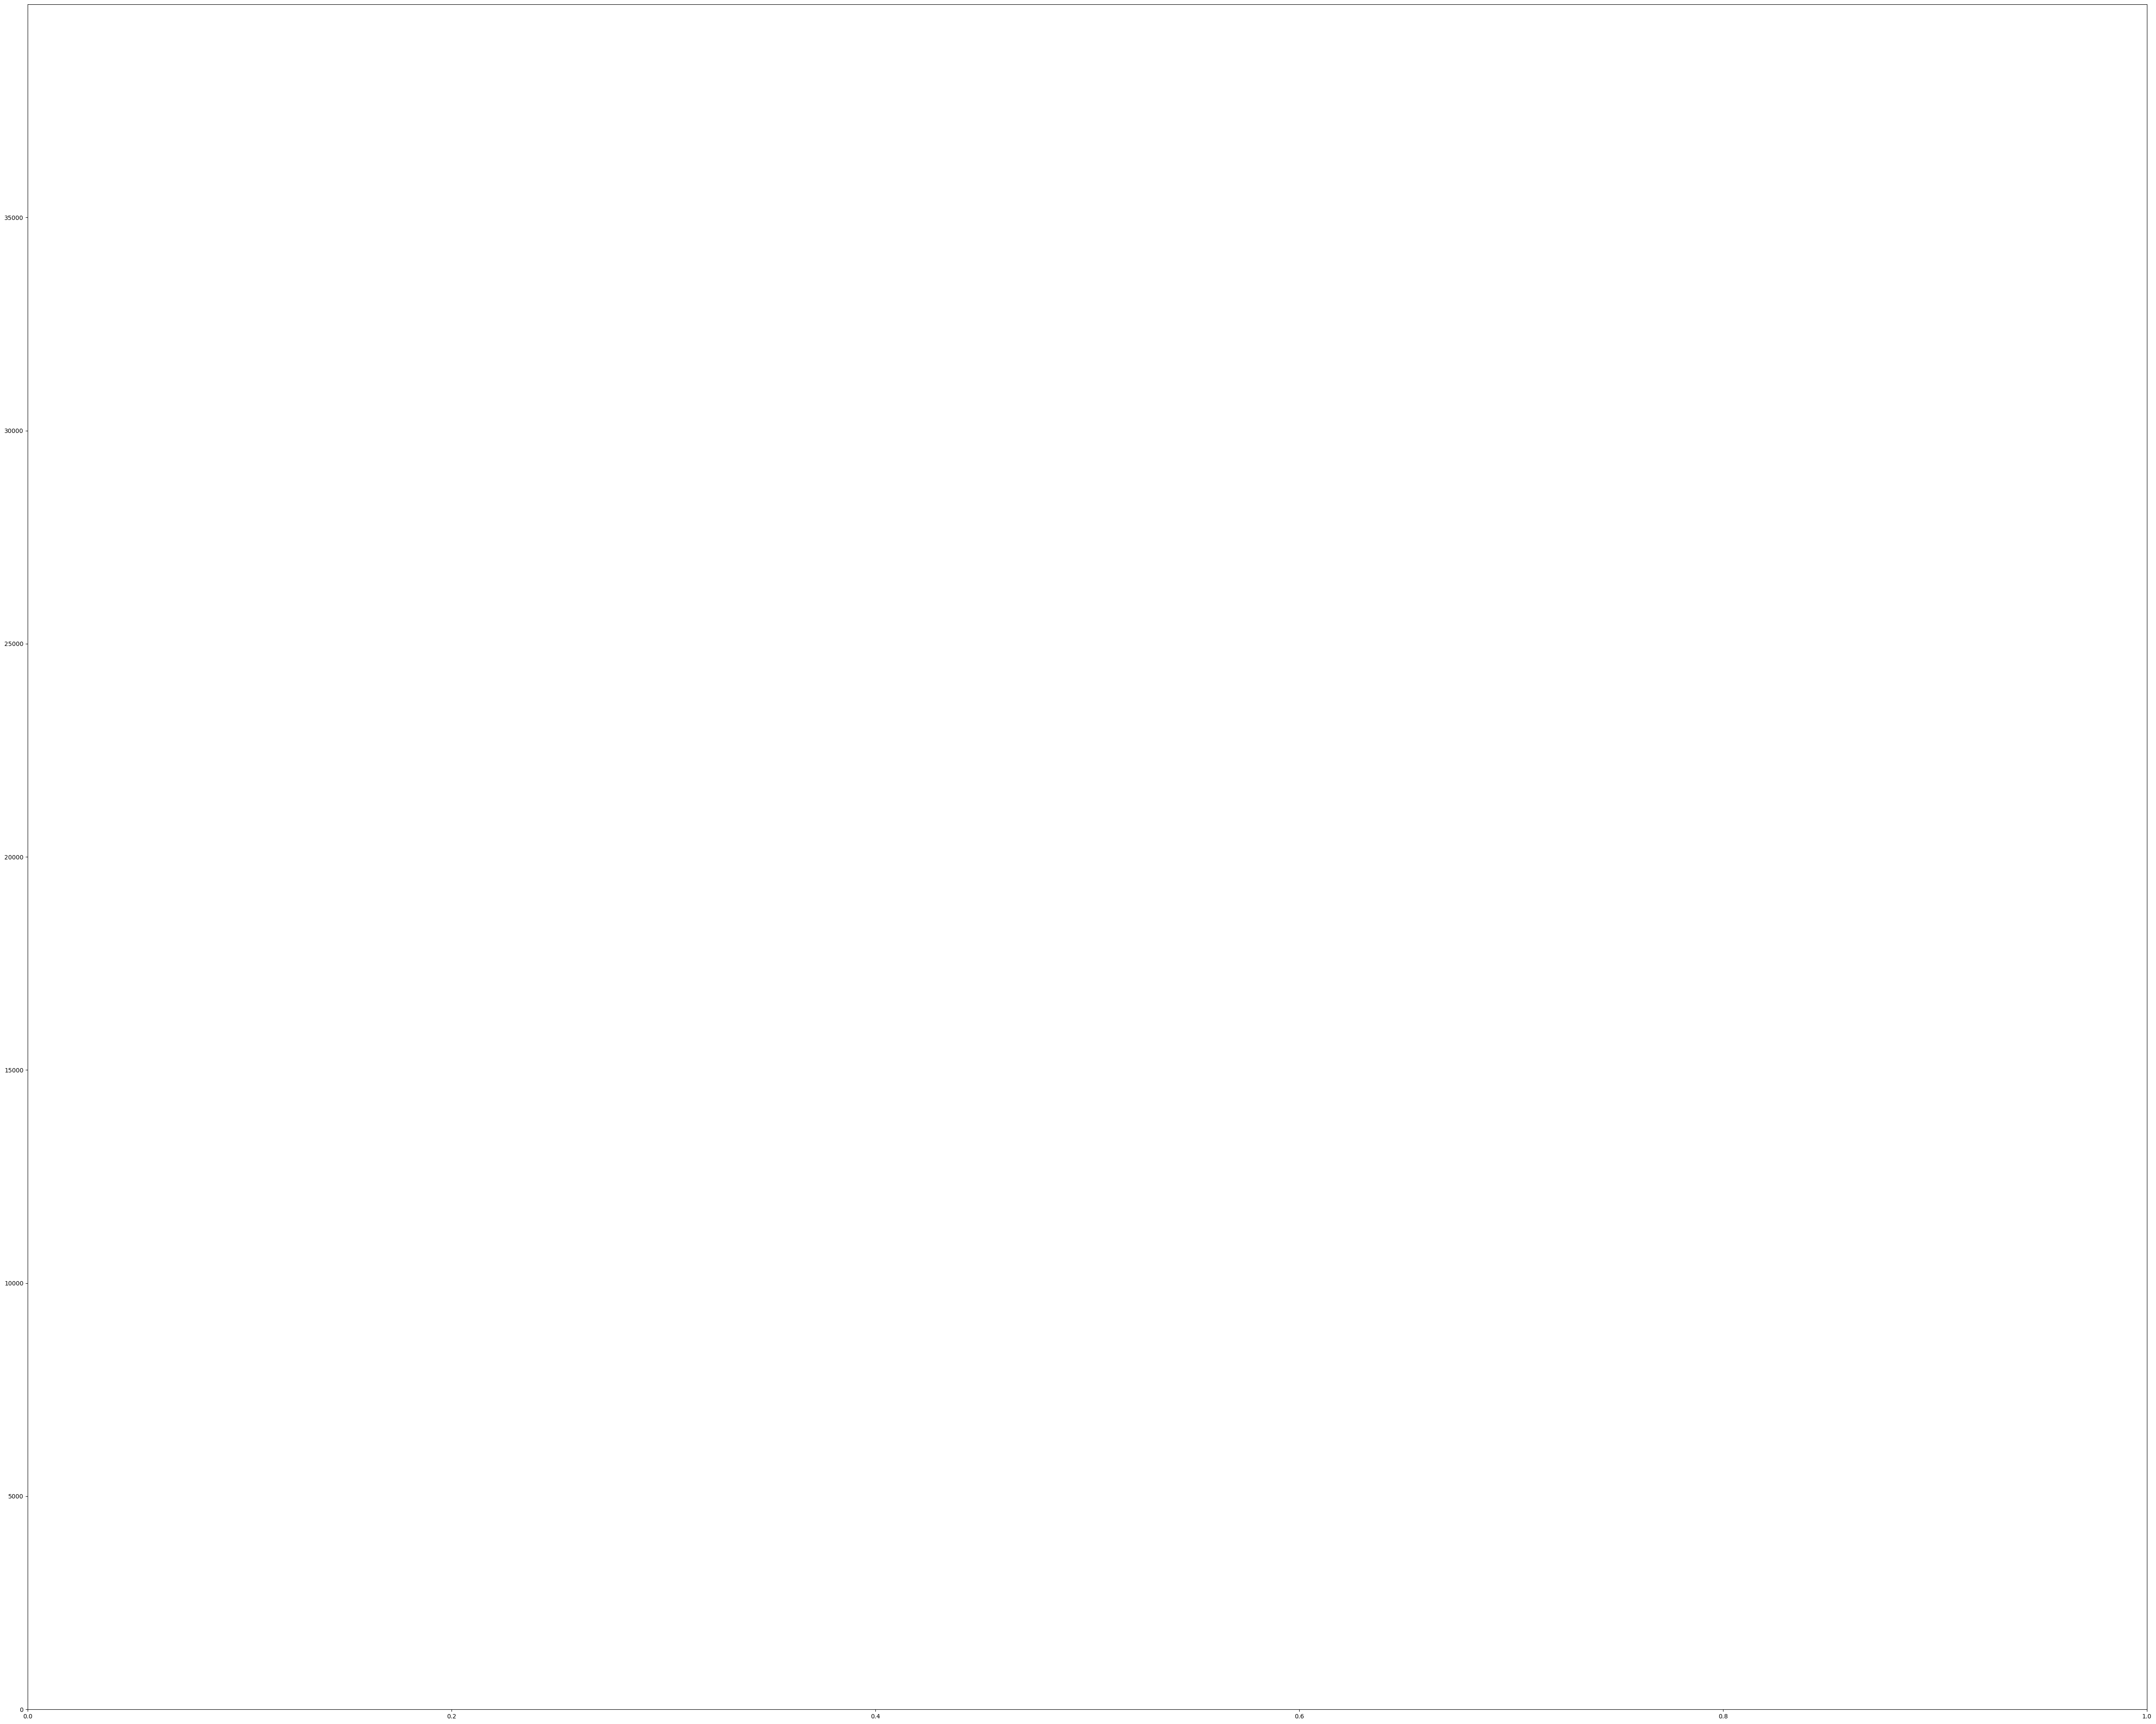

In [34]:
# Generate a bar plot showing the total number of rows (Data Value/Topic) for each chronic disease using pyplot.
# Calculate the total number of rows for each chronic disease

# Filter the DataFrame for 'Crude Rate' data value type
# crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

datavalue_topic = cleaned_index_df['Topic'].value_counts()

plt.bar(datavalue_topic.index, datavalue_topic.values)

# Create a bar plot using pyplot
plt.xlabel('Topic')
plt.ylabel('DataValue')
plt.title('Data Value per Topic')
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout()
custom_y_ticks = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]  # Define your custom y ticks
plt.yticks(custom_y_ticks)
plt.ylim(0, max(custom_y_ticks)+5000)
plt.tight_layout()
plt.show()

In [35]:
year_start_array = us_chronic_df["YearStart"]
year_start_array

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
287895    2022
287896    2022
287897    2022
287898    2022
287899    2022
Name: YearStart, Length: 287900, dtype: int64

In [36]:
year_end_array = us_chronic_df["YearEnd"]
year_end_array

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
287895    2022
287896    2022
287897    2022
287898    2022
287899    2022
Name: YearEnd, Length: 287900, dtype: int64

In [37]:
year_range_dict = {"YearStart": year_start_array,
                   "YearEnd": year_end_array}
year_range_dict

{'YearStart': 0         2019
 1         2019
 2         2019
 3         2019
 4         2019
           ... 
 287895    2022
 287896    2022
 287897    2022
 287898    2022
 287899    2022
 Name: YearStart, Length: 287900, dtype: int64,
 'YearEnd': 0         2019
 1         2019
 2         2019
 3         2019
 4         2019
           ... 
 287895    2022
 287896    2022
 287897    2022
 287898    2022
 287899    2022
 Name: YearEnd, Length: 287900, dtype: int64}